CLASSIFICANDO SOBREVIVENTES OU NÃO NO NAUFRÁGIO DO TITANIC.

Bom a proposta da análise é classificar os passageiros entre sobreviventes ou não, logo tenho um problema de classificação, para resolver este tipo de problema usa-se modelos de aprendizado supervisionado para classificação.

## Importes

In [ ]:
# importando bibliotecas para analises
import pandas            as pd 
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [ ]:
# Carregando o dataset através da biblioteca seaborn 
titanic = sns.load_dataset('titanic')

In [ ]:
 
# Visualizando primeiras linhas do conjunto de dados 
titanic.head ()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##Análise Exploratória de Dados

In [ ]:
 
# Visualizando informações de todas as colunas do dataframe  
titanic.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
# Visualizando valores descritivos 
titanic.describe ()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Visualizando a totalidade de valores nulos nos dados
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#Visualizando distribuição de pessoas por sexo entre os integrantes abordo 
titanic.sex.value_counts ()

male      577
female    314
Name: sex, dtype: int64

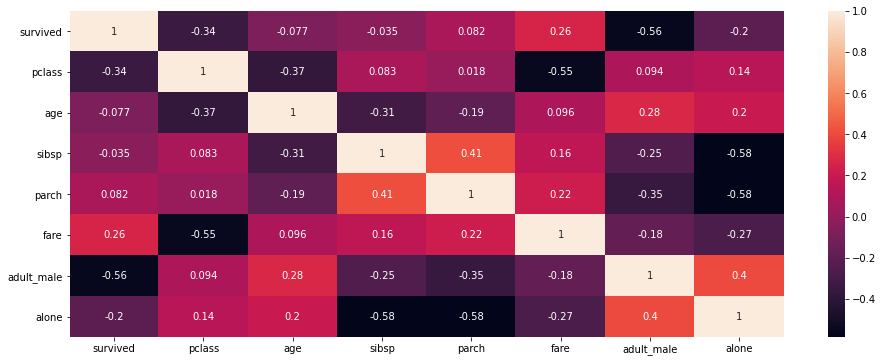

In [ ]:
# Visualizando correlações entre variáveis 
correlacao = titanic.corr()
plt.figure(figsize=(16,6))
sns.heatmap(data=correlacao,annot=True);

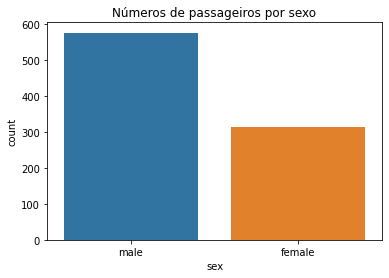

In [ ]:
sns.countplot(x = titanic.sex, data=titanic,)
plt.title("Números de passageiros por sexo");

Text(0.5, 1.0, ' 0 indica morte / 1 indica sobrevivente')

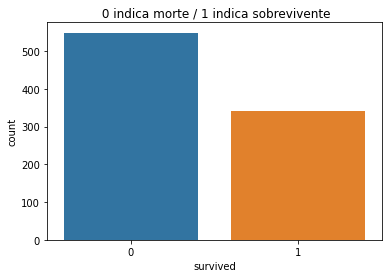

In [ ]:
sns.countplot(x=titanic.survived , data=titanic);
plt.title(" 0 indica morte / 1 indica sobrevivente")

Percebe-se que a classe dependente  encontra-se desbalanceada em uma distribuição similar a bernouli.

In [ ]:
# Verificando a distribuição entre os sobreviventes ou não de acordo as classes
titanic.survived.value_counts ()

0    549
1    342
Name: survived, dtype: int64

## Engenharia de Atributos

In [ ]:
# transformar os valores de sexo que estão como objetos 
# Para números inteiros onde o número 0 representa "Homens" e o número 1 "mulheres"
 
titanic["sexo_numerico"] = titanic["sex"].map({'male': 0, 'female': 1})

In [ ]:
# Visualizando distribuição de pessoas por sexo entre os integrantes abordo
# Agora com sexo em formato númerico 
titanic.sexo_numerico.value_counts ()

0    577
1    314
Name: sexo_numerico, dtype: int64

In [ ]:
 
# Substituindo valores ausentes na coluna idade , pela própria média das idades
# transformando coluna "idade" de valor flutuante para valor inteiro
media_idade = titanic["age"].mean ()
titanic["age"] = titanic["age"].fillna(media_idade).astype(int)

##Modelagem

In [ ]:
# Atribuindo as colunas preditivas a variável X
# Atribuindo a coluna alvo a variável  y 
X = titanic[["age","fare","sexo_numerico","pclass","sibsp","parch"]]
y = titanic["survived"]

In [ ]:
# importando bibliotecas de modelos de machine learning  
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Metricas de avaliação
from sklearn.metrics         import classification_report, confusion_matrix

In [ ]:
# Divisão dados de treino e teste
np.random.seed(0)
X_treino,X_teste,y_treino,y_teste = train_test_split (X,y,
                                                      test_size=0.5,
                                                      random_state=42)

In [ ]:
 
# A forma como os dados são divididos pelo train_test_split
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((445, 6), (446, 6), (445,), (446,))

#Algoritmos

##1° modelo - Floresta Aleatória

In [ ]:
# Instânciando modelo
#1°
clf_rf = RandomForestClassifier (bootstrap=True,
                                 n_estimators=1000,
                                 n_jobs=-1,
                                 random_state=42,
                                 max_features='sqrt')

In [ ]:
# MODELO RANDOM FOREST CLASSIFIER 
# fit 
clf_rf.fit (X_treino,y_treino)
# predict
y_pred = clf_rf.predict(X_teste)

In [ ]:
 # Avaliação do modelo nos dados de teste
 
clf_rf.score(X_teste,y_teste)

0.8318385650224215

In [ ]:
# Validação Cruzada, com 5 folds e avaliação por acuracia 
 
score = cross_val_score(clf_rf, X, y, cv=5, scoring="accuracy")

In [ ]:
# Score Validação Cruzada
score.mean()

0.818234887954303

In [ ]:
# Precisão do modelo
print("clf_rf:")
print(classification_report(y_teste,y_pred))
print("matriz_confusao:\n%s"%(confusion_matrix(y_teste,y_pred)))

clf_rf:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       267
           1       0.82      0.75      0.78       179

    accuracy                           0.83       446
   macro avg       0.83      0.82      0.82       446
weighted avg       0.83      0.83      0.83       446

matriz_confusao:
[[237  30]
 [ 45 134]]


##2° - Árvore de Decisão

In [ ]:
# Instanciando modelo
 #2°
clf_Tree = DecisionTreeClassifier (max_depth=3,
                                   max_features='sqrt',
                                   random_state=42)

In [ ]:
# MODELO ÁRVORE DE DECISÃO CLASSIFICAÇÃO 
#fit
clf_Tree.fit (X_treino,y_treino)
#predict
y_pred = clf_Tree.predict(X_teste)

In [ ]:
# Avaliação do modelo nos dados de teste
 
clf_Tree.score(X_teste,y_teste)

0.8094170403587444

In [ ]:
 # Validação Cruzada, com 5 folds e avaliação por acuracia 
 
score = cross_val_score(clf_Tree, X, y, cv=5, scoring="accuracy")

In [ ]:
 # Score Validação Cruzada
score.mean ()

0.8114305442219573

In [ ]:
 # Precisão do modelo
print("clf_Tree:")
print(classification_report(y_teste,y_pred))
print("matriz_confusao:\n%s"%(confusion_matrix(y_teste, y_pred)))

clf_Tree:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       267
           1       0.83      0.66      0.74       179

    accuracy                           0.81       446
   macro avg       0.81      0.79      0.79       446
weighted avg       0.81      0.81      0.80       446

matriz_confusao:
[[242  25]
 [ 60 119]]


##3°- Regressão Logística

In [ ]:
# Instanciando modelo
#3°
clf_lr = LogisticRegression(n_jobs=-1,
                            random_state=42)

In [ ]:
# MODELO REGRESSÃO LOGÍSTICA 
#fit
clf_lr.fit(X_treino,y_treino)
#predict
y_pred = clf_lr.predict(X_teste)

In [ ]:
 # Avaliação do modelo nos dados de teste
 
clf_lr.score(X_teste,y_teste)

0.804932735426009

In [ ]:
 # Validação Cruzada, com 5 folds e avaliação por acuracia 
 
score = cross_val_score(clf_lr, X, y, cv=5, scoring="accuracy")

In [ ]:
 # Score Validação Cruzada
score.mean()

0.7856317870817903

In [ ]:
 # Precisão do modelo
print("clf_lr:")
print(classification_report(y_teste,y_pred))
print("matriz_confusao:\n%s"%(confusion_matrix(y_teste,y_pred)))

clf_lr:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       267
           1       0.79      0.70      0.74       179

    accuracy                           0.80       446
   macro avg       0.80      0.79      0.79       446
weighted avg       0.80      0.80      0.80       446

matriz_confusao:
[[233  34]
 [ 53 126]]


###Vou verificar se eu e minha família sobreviveriamos ao naufrágio  do Titanic fazendo uma requisição ao modelo.
 
No array do numpy vou considerar a idade do tripulante,valor médio de embarque(32.20),sexo(0 = homem,1 = mulher),número da classe (2, segunda classe),acompanhados(1,sim), quantidade de pais e filhos a bordo(2)

In [ ]:
# Listando os atributos de acordo aos dados de treino (X) recebidos no período de seleção de features(variáveis preditoras) no início da análise.
 
Eric = np.array([22, 32.2, 0, 2, 1, 2]).reshape((1, -1))
Emily = np.array([14, 32.2, 1, 2, 1, 2]).reshape((1, -1))
Maria = np.array([47, 32.2, 1, 2, 1, 2]).reshape((1, -1))
Antonio = np.array([57, 32.2, 0, 2, 1, 2]).reshape((1, -1))

In [ ]:
print("Eric:   \t{}".format(clf_rf.predict(Eric)[0]))
print("Emily:  \t{}".format(clf_rf.predict(Emily)[0]))
print("Maria:  \t{}".format(clf_rf.predict(Maria)[0]))
print("Antonio:\t{}".format(clf_rf.predict(Antonio)[0]))
 
print("O RESULTADO COM  NÚMERO (1) SIGNIFICA QUE É SOBREVIVENTE E COM (0) NÃO")

Eric:   	0
Emily:  	1
Maria:  	1
Antonio:	0
O RESULTADO COM  NÚMERO (1) SIGNIFICA QUE É SOBREVIVENTE E COM (0) NÃO


ISTO É O FIM OBRIGADO !